# Foundations of Data Analysis : Lab Exercise A4
Varun Devgon
11849004
SoSe 2020

Instructions: Compile and Execute using Jupyter Notebook

### Task 1 Dimensionality Reduction, Latent Semantic Indexing (30 P)

Latent semantic indexing (LSI) is an indexing and retrieval method that uses the singular value decomposition
to identify patterns in the relationships between the terms and concepts contained in unstructured text. In this 2
exercise it is highly recommended to use existing libraries such as sklearn and gensim . We also provide a python template lsi template.py for the preprocessing of text. This has the advantage, that your results will be comparable to others.

(a) Use the 20newsgroups dataset and use gensim to apply the LSI transformation on tf-idf model. Make yourself familiar with the tf-idf measure (10 points).

In [1]:
import pprint # pretty printer
import logging
from sklearn.datasets import fetch_20newsgroups
from fda_helper import preprocess_data
from gensim import corpora, models, similarities

# enable logging to display what is happening
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# read dataset 20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

texts = preprocess_data(documents) #performing stemming

dictionary = corpora.Dictionary(texts)

bow_corpus = [dictionary.doc2bow(text) for text in texts] # bow = Bag Of Words
#print(bow_corpus[0]) # one example document, words maped to ids

tfidf = models.TfidfModel(bow_corpus) # train tf-idf model
corpus_tfidf = tfidf[bow_corpus] # apply transformation on the whole corpus

##  TODO: transform your tfidf model into a LSI Model
##  using python gensim, use num_topics=200
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=200)

2020-06-28 22:12:43,344 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-28 22:12:44,754 : INFO : adding document #10000 to Dictionary(79394 unique tokens: ['act', 'atroc', 'austria', 'away', 'bias']...)
2020-06-28 22:12:44,941 : INFO : built Dictionary(84023 unique tokens: ['act', 'atroc', 'austria', 'away', 'bias']...) from 11314 documents (total 1438608 corpus positions)
2020-06-28 22:12:45,755 : INFO : collecting document frequencies
2020-06-28 22:12:45,756 : INFO : PROGRESS: processing document #0
2020-06-28 22:12:45,881 : INFO : PROGRESS: processing document #10000
2020-06-28 22:12:45,899 : INFO : calculating IDF weights for 11314 documents and 84023 features (789468 matrix non-zeros)
2020-06-28 22:12:46,072 : INFO : using serial LSI version on this node
2020-06-28 22:12:46,073 : INFO : updating model with new documents
2020-06-28 22:12:49,484 : INFO : preparing a new chunk of documents
2020-06-28 22:12:49,672 : INFO : using 100 extra samples and 2 power ite

(b) Pick a random document and try to query it with the terms contained in the document. Summarize your findings and interpret the result in the report (20 points).

In [2]:
## TODO: query! pick a random document and formulate a query based on the
## terms in the document.
query = texts[0][60] + " " + texts[0][55] + " " + texts[0][65] + " " + texts[0][67]
print(query)

## TODO: initialize a query structure for your LSI space
vec_bow = dictionary.doc2bow(query.lower().split())
vec_lsi = lsi[vec_bow]  # convert the query to LSI space

## TODO: perform the query on the LSI space, interpret the result and summarize your findings in the report
index = similarities.MatrixSimilarity(lsi[corpus_tfidf])  # transform corpus to LSI space and index it

sims = index[vec_lsi]  # perform a similarity query against the corpus

sims = sorted(enumerate(sims), key=lambda item: -item[1])
print("     Best 10\n(document, similarity)")
for i,s in enumerate(sims):
    print(s) if i < 10 else 0

2020-06-28 22:12:55,180 : WARNING : scanning corpus to determine the number of features (consider setting `num_features` explicitly)


holocaust soldier jew race


2020-06-28 22:12:59,789 : INFO : creating matrix with 11314 documents and 200 features


     Best 10
(document, similarity)
(10440, 0.89220333)
(10897, 0.880618)
(3598, 0.8179035)
(11074, 0.8100592)
(9053, 0.80776036)
(10166, 0.7942509)
(7622, 0.7936505)
(5426, 0.7934833)
(5747, 0.78836334)
(10916, 0.76658666)


### Summary: 

tf-idf (term frequency–inverse document frequency) has an advantage over the bag of words that the bag of words do not have any semantic meanings or they do not consider the importance of words in a collection of corpus only the frequency. tf-idf is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.

Result - From the document number 1, a combination of words were put together to create a query "holocaust soldier jew race". Then based on the query picked, and using the LSI model, this query was applied to the model and top 10 similar documents from the corpus were searched and displayed. It can be seen that the LSI model establishes similarity based on the closeness in the meaning rather than the occurence of the words themselves this is why other documents have been given a higher similarity score than the document itself from which the query was generated. 

### Task 2 Clustering (30 P) 

In this task you try different clustering algorithms and evaluate them using Normalized Mutual Information (NMI) and the Silhouette Score. Use three different datasets: noCluster2_1K.csv, noCluster2_2K.csv, and noCluster3_1K.csv.

(a) Import and plot the data and if necessary preprocess it using sklearn.preprocessing.

(b) Try three different clustering techniques such as DBSCAN, KMeans and AverageLink, which are already implemented in scikit-learn. Please state which algorithms you have used and what parameters you have chosen and why you have chosen them.

(c) Evaluate each clustering technique using Normalized Mutual Information3 as well as the Silhouette Score. For the evaluation, use the sklearn.metrics package.

(d) Briefly explain in your own words what the two evaluation metrics measure and discuss your results, e.g. for which data sets and cluster algorithms do the scores agree or disagree?

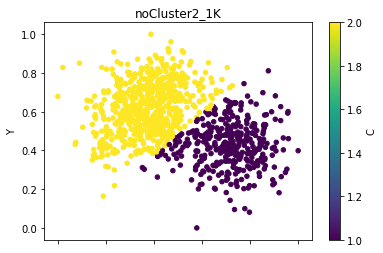

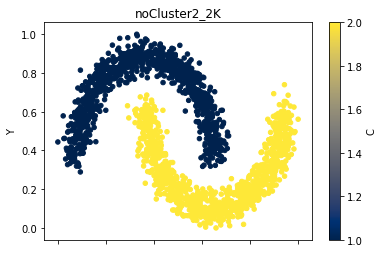

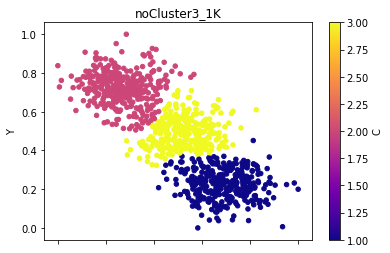

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics.cluster import normalized_mutual_info_score, silhouette_score
data1 = pd.read_csv('noCluster2_1K.csv')
data2 = pd.read_csv('noCluster2_2K.csv')
data3 = pd.read_csv('noCluster3_1K.csv')

#Preprocessing Data to scale between 0,1 range
scaler = MinMaxScaler()
data1[['X', 'Y']] = scaler.fit_transform(data1[['X', 'Y']])
data2[['X', 'Y']] = scaler.fit_transform(data2[['X', 'Y']])
data3[['X', 'Y']] = scaler.fit_transform(data3[['X', 'Y']])

#Plotting Data
data1.plot.scatter(title="noCluster2_1K" ,x='X',y='Y',c='C',colormap = 'viridis')
data2.plot.scatter(title="noCluster2_2K" ,x='X',y='Y',c='C',colormap = 'cividis')
data3.plot.scatter(title="noCluster3_1K" ,x='X',y='Y',c='C',colormap = 'plasma')

### K Means 

In [4]:
kmeans_labels_data1 = []
kmeans_labels_data2 = []
kmeans_labels_data3 = []
clusters = []
kmeans_nmi_data1 = []
kmeans_slt_data1 = []
kmeans_nmi_data2 = []
kmeans_slt_data2 = []
kmeans_nmi_data3 = []
kmeans_slt_data3 = []
for i in range(2,20):
    clusters.append(i)
    kmeans = KMeans(n_clusters=i)
    kmeans_labels_data1.append(kmeans.fit_predict(data1[['X', 'Y']]))
    kmeans_labels_data2.append(kmeans.fit_predict(data2[['X', 'Y']]))
    kmeans_labels_data3.append(kmeans.fit_predict(data3[['X', 'Y']]))
#Dataset 1
for i in kmeans_labels_data1:
    kmeans_nmi_data1.append(normalized_mutual_info_score(data1['C'], i))
    kmeans_slt_data1.append(silhouette_score(data1[['X','Y']],i))
#Dataset 2
for i in kmeans_labels_data2:
    kmeans_nmi_data2.append(normalized_mutual_info_score(data2['C'], i))
    kmeans_slt_data2.append(silhouette_score(data2[['X','Y']],i))
#Dataset 3
for i in kmeans_labels_data3:
    kmeans_nmi_data3.append(normalized_mutual_info_score(data3['C'], i))
    kmeans_slt_data3.append(silhouette_score(data3[['X','Y']],i))
data1['Kmeans'] = kmeans_labels_data1[0]
data2['Kmeans'] = kmeans_labels_data2[0]
data3['Kmeans'] = kmeans_labels_data3[1]

### K Means Plots 

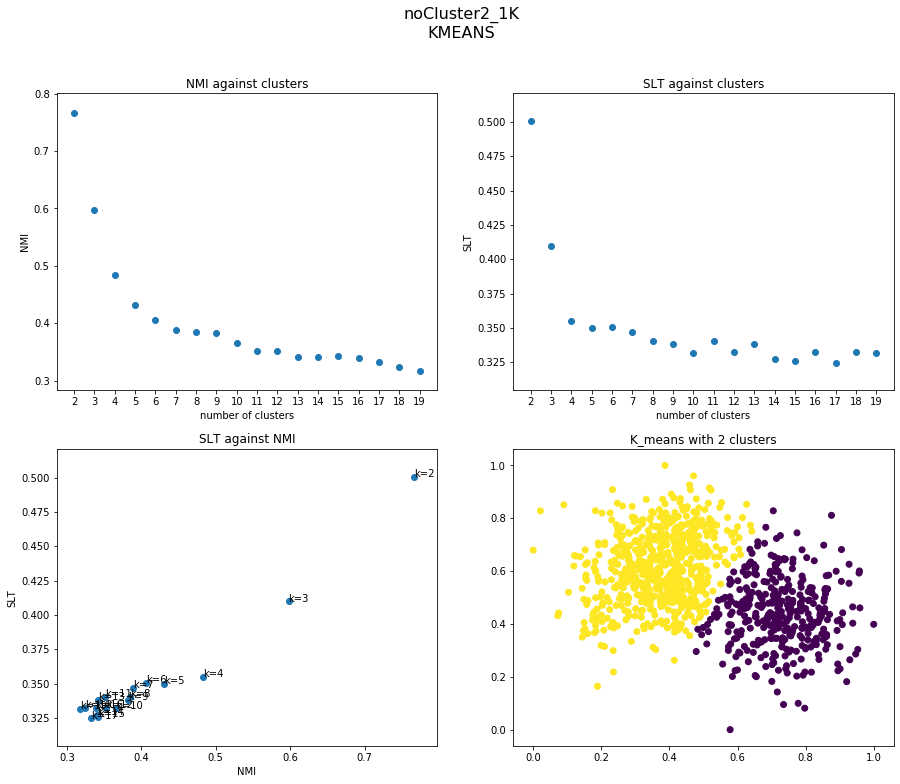

In [5]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15, 12)
fig.suptitle('noCluster2_1K\nKMEANS', fontsize=16)
ax[0,0].set_title("NMI against clusters")
ax[0,0].scatter(clusters, kmeans_nmi_data1)
ax[0,0].set_xlabel("number of clusters")
ax[0,0].set_ylabel("NMI")
ax[0,0].set_xticks(np.arange(min(clusters), max(clusters)+1, 1.0))

ax[0,1].set_title("SLT against clusters")
ax[0,1].scatter(clusters, kmeans_slt_data1)
ax[0,1].set_xlabel("number of clusters")
ax[0,1].set_ylabel("SLT")
ax[0,1].set_xticks(np.arange(min(clusters), max(clusters)+1, 1.0))

ax[1,0].set_title("SLT against NMI")
ax[1,0].scatter(kmeans_nmi_data1, kmeans_slt_data1)
ax[1,0].set_xlabel("NMI")
ax[1,0].set_ylabel("SLT")
for i, txt in enumerate(clusters):
    ax[1,0].annotate("k=%s"%txt, (kmeans_nmi_data1[i], kmeans_slt_data1[i]))



ax[1,1].set_title("K_means with 2 clusters")
ax[1,1].scatter(data1['X'], data1['Y'], c = data1['Kmeans'])

plt.show()

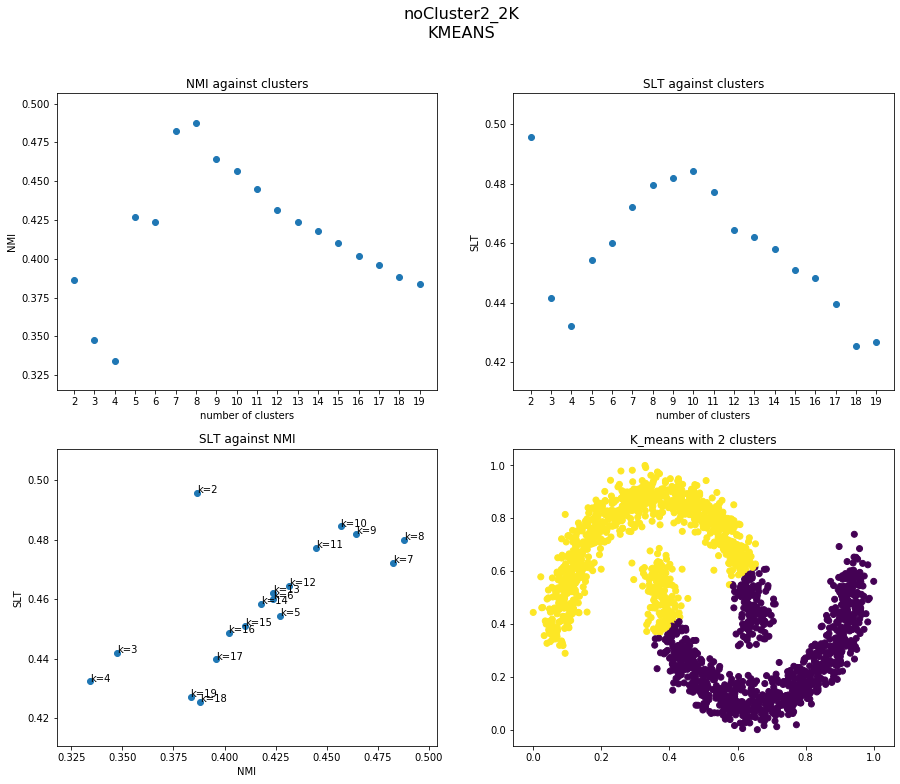

In [6]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15, 12)
fig.suptitle('noCluster2_2K\nKMEANS', fontsize=16)
ax[0,0].set_title("NMI against clusters")
ax[0,0].scatter(clusters, kmeans_nmi_data2)
ax[0,0].set_xlabel("number of clusters")
ax[0,0].set_ylabel("NMI")
ax[0,0].set_xticks(np.arange(min(clusters), max(clusters)+1, 1.0))

ax[0,1].set_title("SLT against clusters")
ax[0,1].scatter(clusters, kmeans_slt_data2)
ax[0,1].set_xlabel("number of clusters")
ax[0,1].set_ylabel("SLT")
ax[0,1].set_xticks(np.arange(min(clusters), max(clusters)+1, 1.0))

ax[1,0].set_title("SLT against NMI")
ax[1,0].scatter(kmeans_nmi_data2, kmeans_slt_data2)
ax[1,0].set_xlabel("NMI")
ax[1,0].set_ylabel("SLT")
for i, txt in enumerate(clusters):
    ax[1,0].annotate("k=%s"%txt, (kmeans_nmi_data2[i], kmeans_slt_data2[i]))



ax[1,1].set_title("K_means with 2 clusters")
ax[1,1].scatter(data2['X'], data2['Y'], c = data2['Kmeans'])

plt.show()

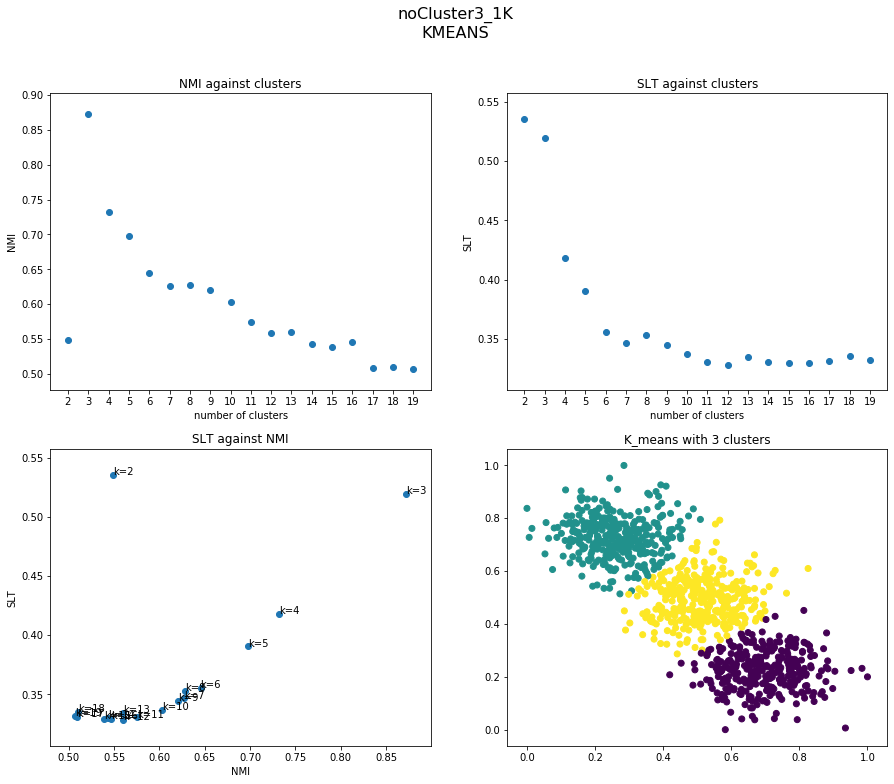

In [7]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15, 12)
fig.suptitle('noCluster3_1K\nKMEANS', fontsize=16)
ax[0,0].set_title("NMI against clusters")
ax[0,0].scatter(clusters, kmeans_nmi_data3)
ax[0,0].set_xlabel("number of clusters")
ax[0,0].set_ylabel("NMI")
ax[0,0].set_xticks(np.arange(min(clusters), max(clusters)+1, 1.0))

ax[0,1].set_title("SLT against clusters")
ax[0,1].scatter(clusters, kmeans_slt_data3)
ax[0,1].set_xlabel("number of clusters")
ax[0,1].set_ylabel("SLT")
ax[0,1].set_xticks(np.arange(min(clusters), max(clusters)+1, 1.0))

ax[1,0].set_title("SLT against NMI")
ax[1,0].scatter(kmeans_nmi_data3, kmeans_slt_data3)
ax[1,0].set_xlabel("NMI")
ax[1,0].set_ylabel("SLT")
for i, txt in enumerate(clusters):
    ax[1,0].annotate("k=%s"%txt, (kmeans_nmi_data3[i], kmeans_slt_data3[i]))



ax[1,1].set_title("K_means with 3 clusters")
ax[1,1].scatter(data3['X'], data3['Y'], c = data3['Kmeans'])

plt.show()

### DBSCAN 

In [8]:
dbscan_labels_data1 = DBSCAN(eps = 0.035, min_samples=8).fit_predict(data1[['X', 'Y']])
dbscan_labels_data2 = DBSCAN(eps = 0.07, min_samples=10).fit_predict(data2[['X', 'Y']])
dbscan_labels_data3 = DBSCAN(eps = 0.04, min_samples=15).fit_predict(data3[['X', 'Y']])

data1['DBSCAN'] = dbscan_labels_data1
data2['DBSCAN'] = dbscan_labels_data2
data3['DBSCAN'] = dbscan_labels_data3

Normalized Mutual Informations

In [9]:
dbscan_nmi_data1 = normalized_mutual_info_score(data1['C'], data1['DBSCAN'])
dbscan_nmi_data2 = normalized_mutual_info_score(data2['C'], data2['DBSCAN'])
dbscan_nmi_data3 = normalized_mutual_info_score(data3['C'], data3['DBSCAN'])
print(dbscan_nmi_data1, dbscan_nmi_data2, dbscan_nmi_data3)

0.4940954235111324 1.0 0.6430705781332482


Silhouette Scores 

In [10]:
dbscan_slt_data1 = silhouette_score(data1[['X','Y']],data1['DBSCAN'])
dbscan_slt_data2 = silhouette_score(data2[['X','Y']],data2['DBSCAN'])
dbscan_slt_data3 = silhouette_score(data3[['X','Y']],data3['DBSCAN'])
print(dbscan_slt_data1, dbscan_slt_data2, dbscan_slt_data3)

0.1820113231928167 0.3861596397290681 0.29937421704620804


#### DBSCAN plots

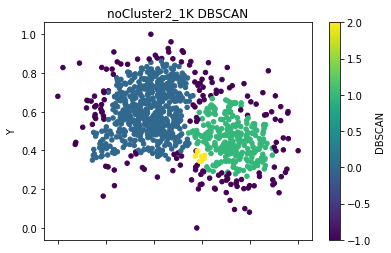

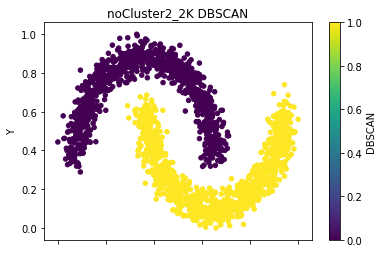

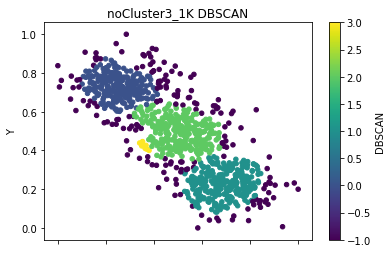

In [11]:
data1.plot.scatter(title="noCluster2_1K DBSCAN" ,x='X',y='Y',c='DBSCAN',colormap = 'viridis')
data2.plot.scatter(title="noCluster2_2K DBSCAN" ,x='X',y='Y',c='DBSCAN',colormap = 'viridis')
data3.plot.scatter(title="noCluster3_1K DBSCAN" ,x='X',y='Y',c='DBSCAN',colormap = 'viridis')

### Average Link

In [12]:
avlabels3 = AgglomerativeClustering(n_clusters=3,linkage='average').fit_predict(data3[['X', 'Y']])

av_labels_data1 = []
av_labels_data2 = []
av_labels_data3 = []
clusters2 = []
av_nmi_data1 = []
av_slt_data1 = []
av_nmi_data2 = []
av_slt_data2 = []
av_nmi_data3 = []
av_slt_data3 = []
for i in range(2,20):
    clusters2.append(i)
    av_labels_data1.append(AgglomerativeClustering(n_clusters=i,linkage='average').fit_predict(data1[['X', 'Y']]))
    av_labels_data2.append(AgglomerativeClustering(n_clusters=i,linkage='average').fit_predict(data2[['X', 'Y']]))
    av_labels_data3.append(AgglomerativeClustering(n_clusters=i,linkage='average').fit_predict(data3[['X', 'Y']]))
    
#Dataset 1
for i in av_labels_data1:
    av_nmi_data1.append(normalized_mutual_info_score(data1['C'], i))
    av_slt_data1.append(silhouette_score(data1[['X','Y']],i))
#Dataset 2
for i in av_labels_data2:
    av_nmi_data2.append(normalized_mutual_info_score(data2['C'], i))
    av_slt_data2.append(silhouette_score(data2[['X','Y']],i))
#Dataset 3
for i in av_labels_data3:
    av_nmi_data3.append(normalized_mutual_info_score(data3['C'], i))
    av_slt_data3.append(silhouette_score(data3[['X','Y']],i))
data1['AV'] = av_labels_data1[1]
data2['AV'] = av_labels_data2[0]
data3['AV'] = av_labels_data3[1]

### Average Link plots

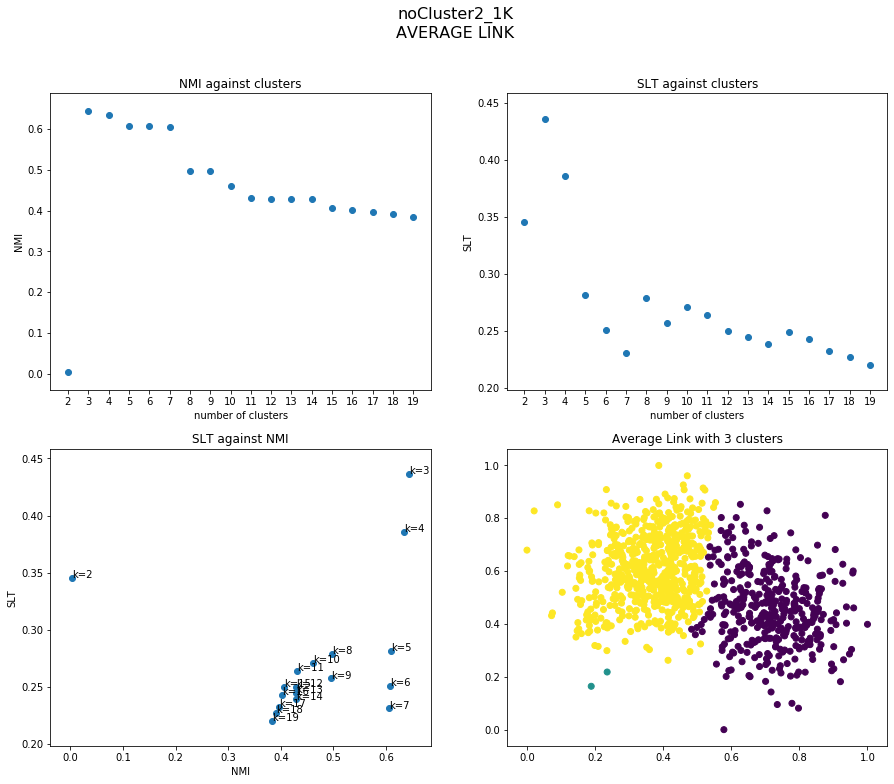

In [13]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15, 12)
fig.suptitle('noCluster2_1K\nAVERAGE LINK', fontsize=16)
ax[0,0].set_title("NMI against clusters")
ax[0,0].scatter(clusters2, av_nmi_data1)
ax[0,0].set_xlabel("number of clusters")
ax[0,0].set_ylabel("NMI")
ax[0,0].set_xticks(np.arange(min(clusters2), max(clusters2)+1, 1.0))

ax[0,1].set_title("SLT against clusters")
ax[0,1].scatter(clusters2, av_slt_data1)
ax[0,1].set_xlabel("number of clusters")
ax[0,1].set_ylabel("SLT")
ax[0,1].set_xticks(np.arange(min(clusters2), max(clusters2)+1, 1.0))

ax[1,0].set_title("SLT against NMI")
ax[1,0].scatter(av_nmi_data1, av_slt_data1)
ax[1,0].set_xlabel("NMI")
ax[1,0].set_ylabel("SLT")
for i, txt in enumerate(clusters2):
    ax[1,0].annotate("k=%s"%txt, (av_nmi_data1[i], av_slt_data1[i]))

ax[1,1].set_title("Average Link with 3 clusters")
ax[1,1].scatter(data1['X'], data1['Y'], c = data1['AV'])

plt.show()

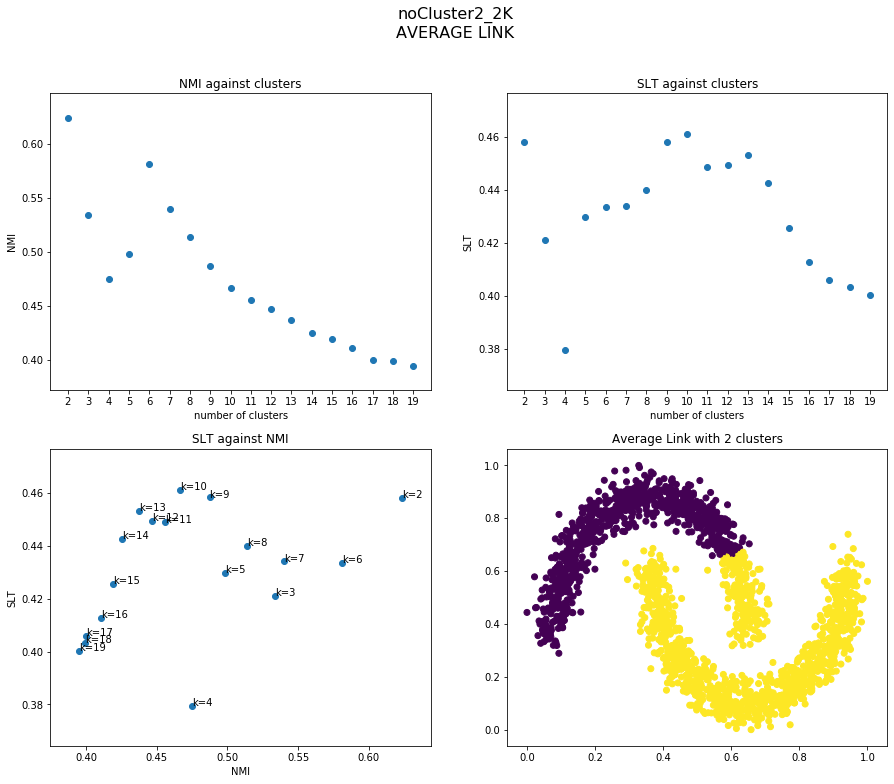

In [14]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15, 12)
fig.suptitle('noCluster2_2K\nAVERAGE LINK', fontsize=16)
ax[0,0].set_title("NMI against clusters")
ax[0,0].scatter(clusters2, av_nmi_data2)
ax[0,0].set_xlabel("number of clusters")
ax[0,0].set_ylabel("NMI")
ax[0,0].set_xticks(np.arange(min(clusters2), max(clusters2)+1, 1.0))

ax[0,1].set_title("SLT against clusters")
ax[0,1].scatter(clusters2, av_slt_data2)
ax[0,1].set_xlabel("number of clusters")
ax[0,1].set_ylabel("SLT")
ax[0,1].set_xticks(np.arange(min(clusters2), max(clusters2)+1, 1.0))

ax[1,0].set_title("SLT against NMI")
ax[1,0].scatter(av_nmi_data2, av_slt_data2)
ax[1,0].set_xlabel("NMI")
ax[1,0].set_ylabel("SLT")
for i, txt in enumerate(clusters2):
    ax[1,0].annotate("k=%s"%txt, (av_nmi_data2[i], av_slt_data2[i]))



ax[1,1].set_title("Average Link with 2 clusters")
ax[1,1].scatter(data2['X'], data2['Y'], c = data2['AV'])

plt.show()

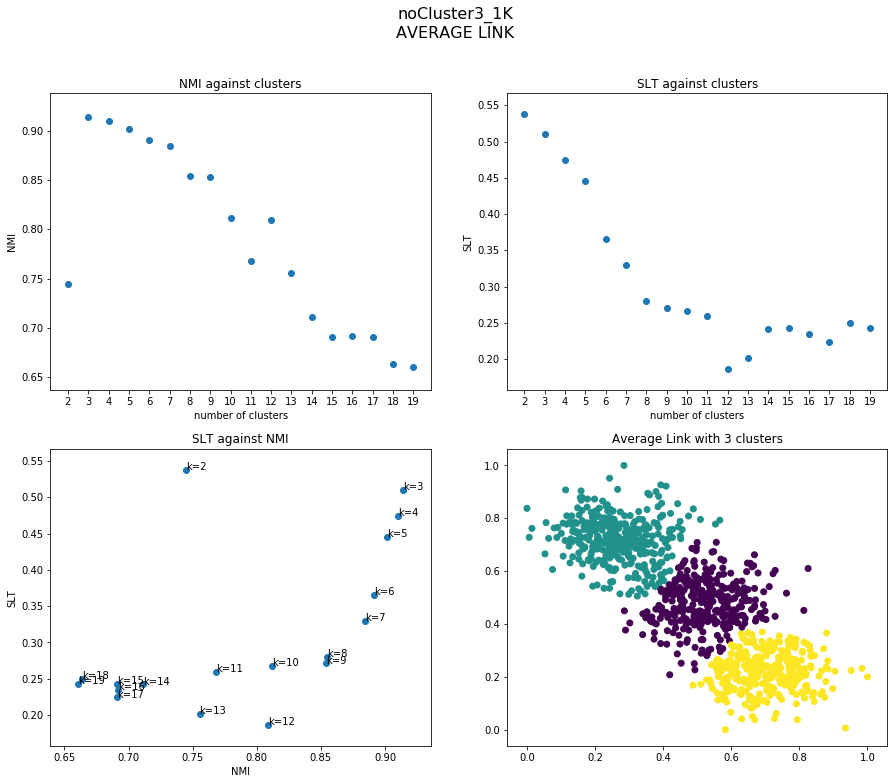

In [16]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15, 12)
fig.suptitle('noCluster3_1K\nAVERAGE LINK', fontsize=16)
ax[0,0].set_title("NMI against clusters")
ax[0,0].scatter(clusters2, av_nmi_data3)
ax[0,0].set_xlabel("number of clusters")
ax[0,0].set_ylabel("NMI")
ax[0,0].set_xticks(np.arange(min(clusters2), max(clusters2)+1, 1.0))

ax[0,1].set_title("SLT against clusters")
ax[0,1].scatter(clusters2, av_slt_data3)
ax[0,1].set_xlabel("number of clusters")
ax[0,1].set_ylabel("SLT")
ax[0,1].set_xticks(np.arange(min(clusters2), max(clusters2)+1, 1.0))

ax[1,0].set_title("SLT against NMI")
ax[1,0].scatter(av_nmi_data3, av_slt_data3)
ax[1,0].set_xlabel("NMI")
ax[1,0].set_ylabel("SLT")
for i, txt in enumerate(clusters2):
    ax[1,0].annotate("k=%s"%txt, (av_nmi_data3[i], av_slt_data3[i]))



ax[1,1].set_title("Average Link with 3 clusters")
ax[1,1].scatter(data3['X'], data3['Y'], c = data3['AV'])

plt.show()

## Summary

a),c) performed above

b) The three clustering algorithms: Kmeans, DBSCAN and Average Link have been applied to the three provided datasets. For Kmeans, the initialisation method was left to the defualt which is the Kmeans++. Also, for all three datatypes the number of clusters were put within a loop, so the Kmeans algorithm was tested with different cluster parameter values between 2 and 20. Finally there performance was evaluated using Normalized Mutual Information as well as the Silhouette Scores and then a cluster value was chosen. 

In the same way like Kmeans algorithm, Agglomerative Clustering was performed with a range of cluster parameter values, the linkage parameter was set to "Average" to make it an Average Link algorithm. The affinity parameter was left to default of euclidean distance. 

Finally, for DBSCAN, different parameter values for 'eps' and 'min_samples' were chosen for the best possible clustering results in all three datasets. The 'eps' referes to the maximum distance between two samples for one to be considered as in the neighborhood of the other. The 'min_samples' refers to the number of samples (or total weight) in a neighborhood for a point to be considered as a core point includint the point itself.

d) Normalised Mutual Information - is a scaled score between 0 and 1 for the normalisation of of the mutual information with 0 being no mutual information and 1 being the perfect correlation. It takes two arrays of same shape as input and in simple words tell the mutual information shared by these arrays or samples. 

Silhouette Score - This takes a feature array and a predicted label array as input. The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

Result = The values of the Normalised Mutual Information and the Silhouette Score were helpful in chosing the correct cluster parameter value in the Kmeans and Average Link algorithms as can also be seen in the plots. Kmeans and Average Link gave very good clustering results for noCluster2_1K.csv and noCluster3_1K.csv. However, these two algorithms did not perform well for the noCluster2_2K.csv where the DBSCAN was able to cluster the samples in the right clusters similar to the ground truth values. So for noCluster2_2K.csv DBSCAN was the best choice of algorithm and for the other two datasets Kmeans and Average Link did a good job.  

##### References:
https://scikit-learn.org/stable/

https://radimrehurek.com/gensim/index.html

https://matplotlib.org/3.2.1/contents.html

### Task -3 Apriori Algorithm for Recommender Systems (40P)
Task Definition:
In this programming assignment, you are required to implement the Apriori algorithm and apply it to mine frequent itemsets for movie recommendation. You are required to implement the algorithm from scratch only using native Python libraries and numpy.
Input: The provided input file (movies.txt) is based on the MovieLens dataset[1]. It contains the favourite movies of 8892 users. Each line in the file corresponds to a user and represents a list of movies the user likes. An example:

Avengers: Infinity War - Part II;Jurassic World: Fallen Kingdom

In the example above, the corresponding user likes the movies “Avengers: Infinity War - Part II” and “Jurassic World: Fallen Kingdom”.

Output: You need to implement the Apriori algorithm and use it to mine sets of movies that are frequent in the input data. After implementing the Apriori algorithm, please set the relative minimum support to 0.05 and run it on the 8892 lists of movies. In other words, you need to extract all the itemsets that have an absolute support larger than 444.

(a) Output all the length-1 frequent movies with their absolute supports into a text file named “oneItems.txt” and place it in the root of your zip file. Every line corresponds to exactly one frequent movie and should be in the following format:

Support:movie

For example, suppose a movie (e.g. Bohemian Rhapsody) has an absolute support 503, then the line corresponding to this frequent item set in “oneItems.txt” should be:

503:Bohemian Rhapsody (10 points)

In [23]:
def singleItems(users):
    movies = []
    movies2 = []
    for user in users:
        for movie in user:
            if [movie] not in movies:
                movies.append([movie])
    movies.sort()
    for movie in movies:
        movie = tuple(movie)
        movies2.append(movie)
    return set(movies2)

def frequent1Scanner(users, movies, ab_support):
    subset_count = {}
    for user in users:
        for movie in movies:
            if set(movie).issubset(user):
                if not movie in subset_count:
                    subset_count[movie] = 1
                else:
                    subset_count[movie] += 1
    n = len(users)
    valid = []
    counts =[]
    for key in subset_count:
        sup = subset_count[key]
        if sup >= ab_support:
            valid.insert(len(valid),key)
            counts.insert(len(valid),sup)
    return valid, counts

def apriori(users, ab_support):
    movies = singleItems(users)
    items, items_counts = frequent1Scanner(users,movies,ab_support)
    return items, items_counts

In [24]:
ab_support = 445

# read data line by line from movies.txt
users = []
textfile = 'movies.txt'
with open(textfile,'r') as file:
    for line in file:
        users.append(line.strip().split(';'))
        
# call apriori
items, items_counts = apriori(users,ab_support)

# print itemsets containing only one element, together with their support
items_txt = open("oneItems.txt", "w")
for i in range(len(items)):
    for movie in items[i]:
        items_txt.write(str(items_counts[i]) + ":" +movie + "\n")
items_txt.close()

(b) Please write all the frequent itemsets along with their absolute supports into a text file named “patterns.txt” and place it in the root of your zip file. Every line corresponds to exactly one frequent itemset and should be in the following format:

support:movie 1;movie 2;movie 3;...

For example, suppose an itemset (Bohemian Rhapsody; Aquaman) has an absolute support 446, then the line corresponding to this frequent itemset in “patterns.txt” should be:

446:Bohemian Rhapsody;Aquaman (20 points)

(c) Imagine you should recommend a movie to a user.You know that the user likes the movies “Ant-Man and the Wasp” and “Spider-Man: Far from Home“. Based on the result of the apriori algorithm, give a movie recommendation for this user by maximizing the confidence that the user will like the movie. Explain your choice and report the confidence score for your recommendation. (Hint: This task is also possible to do without a finished implementation of the apriori algorithm) (10 points)